# Knowledge 11 - Histograma, dispersão e boxsplot

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from bcb import sgs
import matplotlib.ticker as mtick
import matplotlib.dates as mdate
from datetime import datetime
from datetime import timedelta
import yfinance as yf
import matplotlib as mpl
import matplotlib.pylab as lab
import mplcyberpunk

In [2]:
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

In [3]:
cotacoes = yf.download(["WEGE3.SA"])['Close']

retornos_diarios = cotacoes.pct_change().dropna()

/tmp/ipykernel_25601/1726247934.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  cotacoes = yf.download(["WEGE3.SA"])['Close']
[*********************100%***********************]  1 of 1 completed


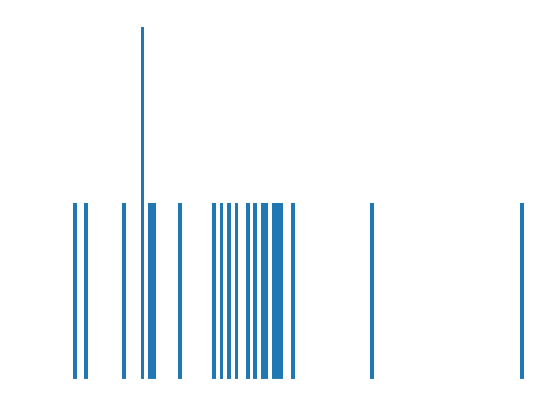

In [4]:
#histograma

fig, ax = plt.subplots()

ax.hist(retornos_diarios.values, bins = 120)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))

plt.show()

In [5]:
cotacoes = yf.download(["WEGE3.SA", "^BVSP"])['Close']

retornos_anuais = cotacoes.resample("Y").last().pct_change().dropna()

retornos_anuais['Ano'] = retornos_anuais.index.year

retornos_anuais

/tmp/ipykernel_25601/2497905292.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  cotacoes = yf.download(["WEGE3.SA", "^BVSP"])['Close']
[*********************100%***********************]  2 of 2 completed
/tmp/ipykernel_25601/2497905292.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  retornos_anuais = cotacoes.resample("Y").last().pct_change().dropna()


Ticker,WEGE3.SA,^BVSP,Ano
Date,,,


In [6]:
plt.style.use("cyberpunk")

https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [7]:
def barra_discreta(vetor_categoria):
    
    cmap = lab.cm.cool  # define a cor
    cmaplist = [cmap(i) for i in range(cmap.N)]
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'cmap escolhido', cmaplist, cmap.N)
    bounds = np.linspace(np.min(vetor_categoria), np.max(vetor_categoria) + 0.5, len(vetor_categoria) + 1)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    
    return bounds, norm

ValueError: You must provide at least 2 boundaries (1 region) but you passed in array([nan])

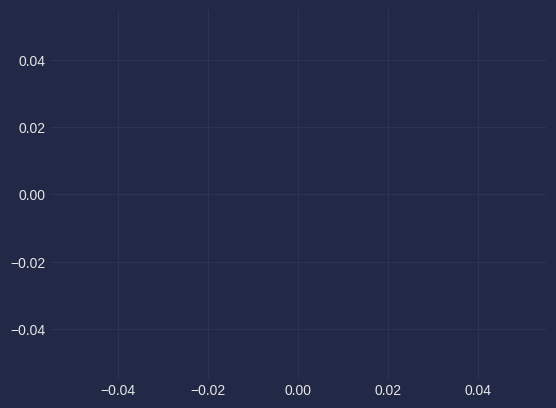

In [11]:
#Dispersão 

fig, ax = plt.subplots()

ax.scatter(retornos_anuais['WEGE3.SA'], retornos_anuais["^BVSP"], c = retornos_anuais['Ano'], cmap="cool")

bounds, norm = barra_discreta(retornos_anuais['Ano'])     

#cria um novo eixo pra barra

ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap="cool", norm=norm,
    spacing='proportional', ticks=bounds + 0.5, boundaries=bounds, format='%1i')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))
ax.set_ylabel("Ibovespa")
ax.set_xlabel("WEGE3")
ax.axhline(y = 0)
ax.axvline(x = 0)
ax.set_title("Retornos anuais WEGE3 X Ibovespa")

plt.show()

# Replique essa estrutura pra qualquer gráfico que você quiser.

É impossível cobrir 100% de tudo de gráficos, utilize o google ao seu favor!
No limite, a única diferença vai ser um "ax.scatter" para um "ax.boxsplot"

In [ ]:
plt.style.use("default")

In [15]:
cotacoes = yf.download(["WEGE3.SA", "^BVSP"])['Volume']

retornos_mensais = cotacoes.resample("ME").last().pct_change().dropna()

/tmp/ipykernel_25601/578656406.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  cotacoes = yf.download(["WEGE3.SA", "^BVSP"])['Volume']
[*********************100%***********************]  2 of 2 completed


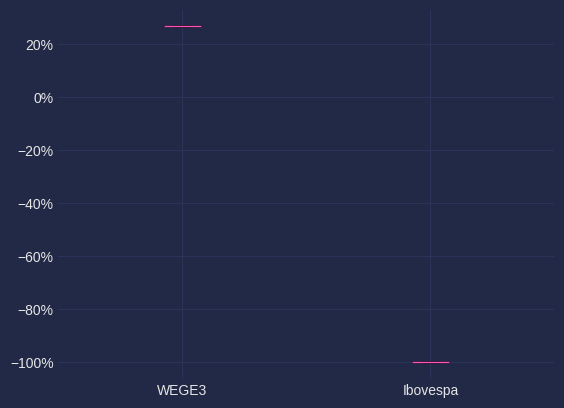

In [16]:
fig, ax = plt.subplots()

ax.boxplot(x = retornos_mensais)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))
ax.set_xticks([1, 2], ["WEGE3", "Ibovespa"])

plt.show()

# Exercícios

* Exercício 103: Crie um histograma com os retornos mensais da Petrobras.
* Exercício 104: Crie um gráfico de dispersão com os retornos anuais do S&P500 contra o Ibovespa.


In [ ]:
#gabarito 103

cotacoes = yf.download(["PETR4.SA"])['Close']

retornos_diarios = cotacoes.resample("M").last().pct_change().dropna()

fig, ax = plt.subplots()

ax.hist(retornos_diarios.values, bins = 35)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))

plt.show()

In [ ]:
#gabarito 104

plt.style.use("cyberpunk")

cotacoes = yf.download(["^GSPC", "^BVSP"])['Close']

retornos_anuais = cotacoes.resample("y").last().pct_change().dropna()

retornos_anuais['Ano'] = retornos_anuais.index.year

In [ ]:
fig, ax = plt.subplots()

ax.scatter(retornos_anuais['^GSPC'], retornos_anuais["^BVSP"], c = retornos_anuais['Ano'], cmap="cool")

bounds, norm = barra_discreta(retornos_anuais['Ano'])     


ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap="cool", norm=norm,
    spacing='proportional', ticks=bounds + 0.5, boundaries=bounds, format='%1i')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))
ax.set_ylabel("Ibovespa")
ax.set_xlabel("S&P500")
ax.axhline(y = 0)
ax.axvline(x = 0)
ax.set_title("Retornos anuais S&P500 X Ibovespa")

plt.show()